In [1]:
import pandas as pd

df = pd.read_csv ('desktop\data\Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#descriptive statistic
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df=df.drop("CustomerID",axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
#the correlation between the variables
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Data visualisation

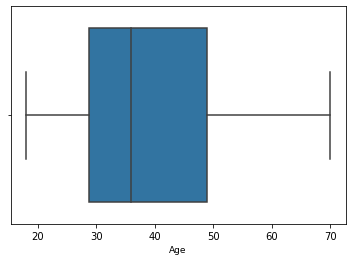

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#the distribution od the "Age"
bx = sns.boxplot(x = df['Age'])
bx.set_xlabel(xlabel = 'Age', fontsize = 9)
plt.show()

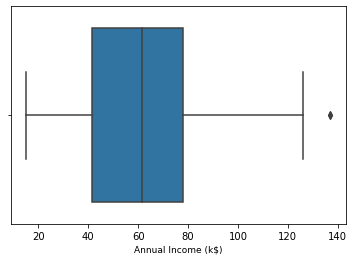

In [9]:
#the boxplot od the "Annual Income (k$)"
bx = sns.boxplot(x = df['Annual Income (k$)'])
bx.set_xlabel(xlabel = 'Annual Income (k$)', fontsize = 9)
plt.show()

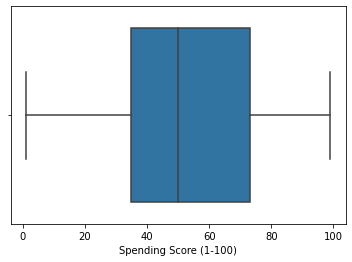

In [10]:
#the boxplot of the "Spending Score (1-100)"
bx = sns.boxplot(x = df['Spending Score (1-100)'])
bx.set_xlabel(xlabel = 'Spending Score (1-100)')
plt.show()

C:\Users\bdiri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bdiri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\bdiri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

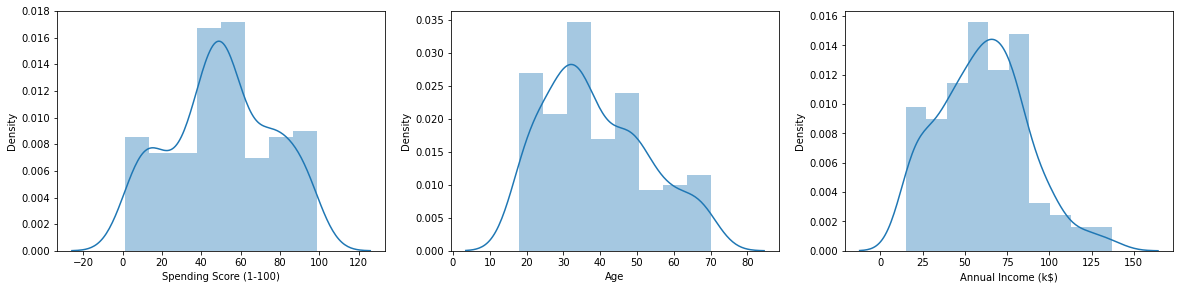

In [14]:
#the distribution of the continue variables
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(df['Spending Score (1-100)'])
plt.subplot(3,3,2)
sns.distplot(df['Age']) 
plt.subplot(3,3,3)
sns.distplot(df['Annual Income (k$)'])

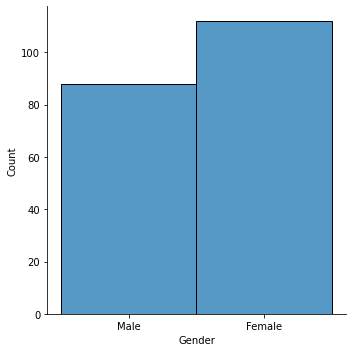

In [15]:
#the distribution of the genders 
import seaborn as sns
sns.displot(df, x="Gender")

# Segmentation based on "Age" and "Annual Income (k)

In [16]:
x1=df[["Age","Annual Income (k$)"]]
x1

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [17]:
#Normalization of the variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_sc1 = sc.fit_transform(x1)

C:\Users\bdiri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



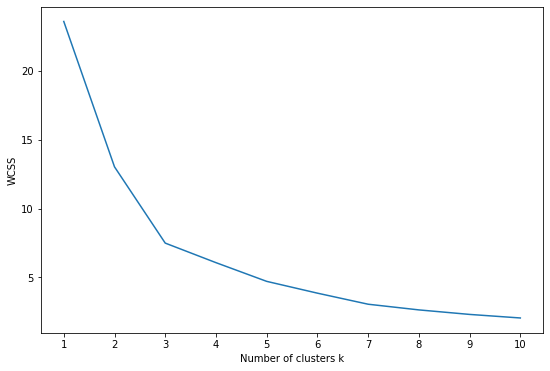

In [18]:
from sklearn.cluster import KMeans
import numpy as np
#x=x.values
# finding optimum number of clusters k
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x_sc1)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of clusters k')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [19]:
#training k-means model
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x_sc1)

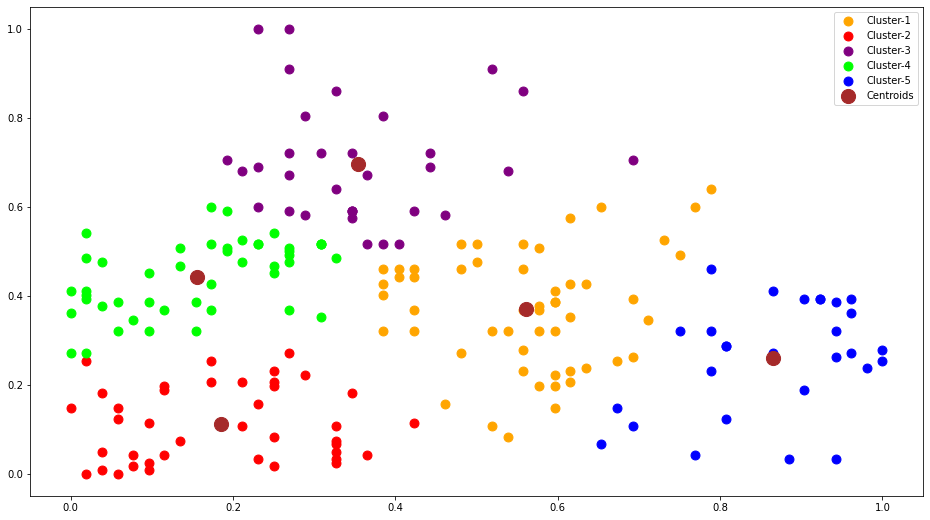

In [20]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x_sc1[y_kmeans == 0, 0], x_sc1[y_kmeans == 0, 1], s = 80, c = 'orange',label = 'Cluster-1')
plt.scatter(x_sc1[y_kmeans == 1, 0], x_sc1[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x_sc1[y_kmeans == 2, 0], x_sc1[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x_sc1[y_kmeans == 3, 0], x_sc1[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x_sc1[y_kmeans == 4, 0], x_sc1[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.legend()
plt.show()

# Segmentation based on "Spending Score (1-100)" and "Annual Income (k)"

In [21]:
x2=df[["Spending Score (1-100)","Annual Income (k$)"]]
x2

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


In [22]:
#normalizing the variables
x_sc2 = sc.fit_transform(x2)

C:\Users\bdiri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



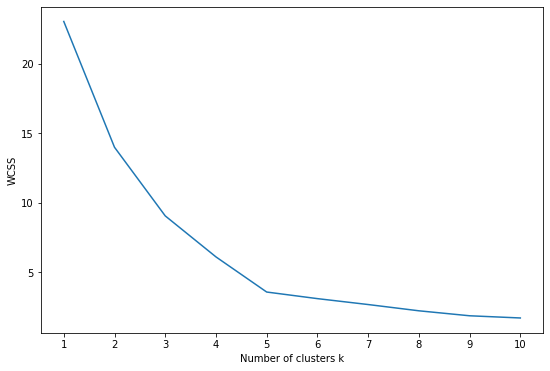

In [23]:
from sklearn.cluster import KMeans
import numpy as np
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x_sc2)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of clusters k')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [24]:
#training the k-means model
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x_sc2)

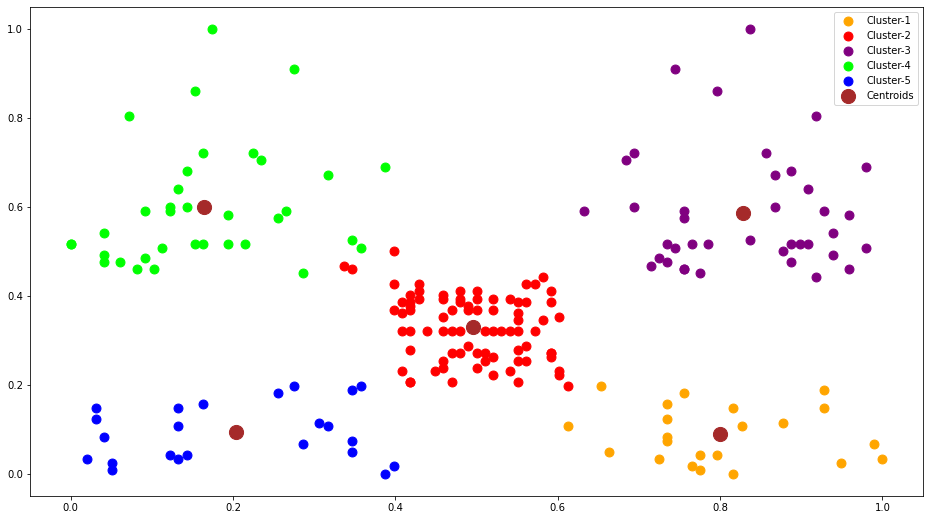

In [25]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x_sc2[y_kmeans == 0, 0], x_sc2[y_kmeans == 0, 1], s = 80, c = 'orange',label = 'Cluster-1')
plt.scatter(x_sc2[y_kmeans == 1, 0], x_sc2[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x_sc2[y_kmeans == 2, 0], x_sc2[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x_sc2[y_kmeans == 3, 0], x_sc2[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x_sc2[y_kmeans == 4, 0], x_sc2[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.legend()
plt.show()

# Segmentation based on "Age" and "Spending Score (1-100)"

In [26]:
x3=df[["Spending Score (1-100)","Age"]]
x3

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31
...,...,...
195,79,35
196,28,45
197,74,32
198,18,32


In [27]:
#normalizing the variables
x_sc3 = sc.fit_transform(x3)

C:\Users\bdiri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



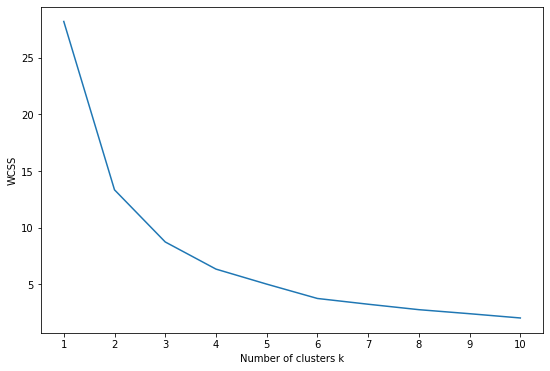

In [28]:
from sklearn.cluster import KMeans
import numpy as np
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x_sc3)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of clusters k')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [29]:
#training k-means model
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x_sc3)

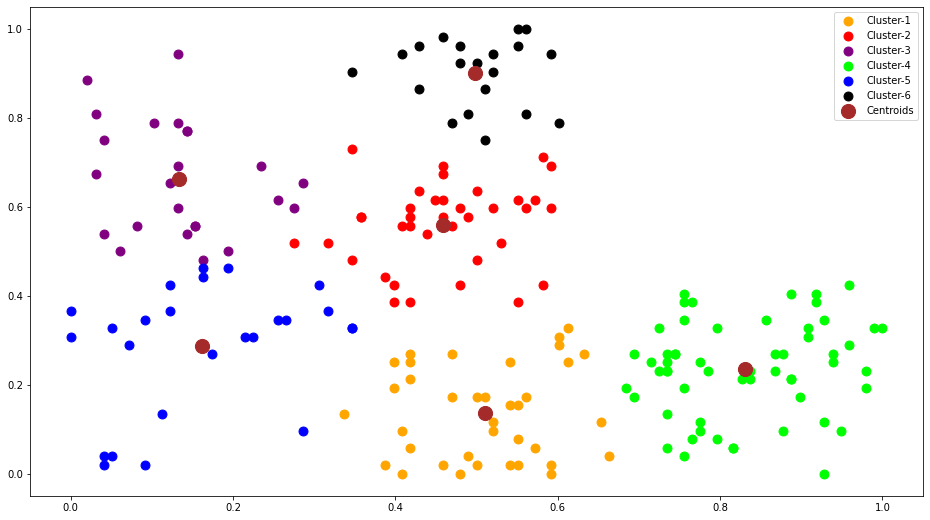

In [30]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x_sc3[y_kmeans == 0, 0], x_sc3[y_kmeans == 0, 1], s = 80, c = 'orange',label = 'Cluster-1')
plt.scatter(x_sc3[y_kmeans == 1, 0], x_sc3[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x_sc3[y_kmeans == 2, 0], x_sc3[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x_sc3[y_kmeans == 3, 0], x_sc3[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x_sc3[y_kmeans == 4, 0], x_sc3[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(x_sc3[y_kmeans == 5, 0], x_sc3[y_kmeans == 5, 1], s = 80, c = 'black', label = 'Cluster-6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.legend()
plt.show()

# Segmentation based on 3 continuous variables : "Spending Score (1-100)","Annual Income (k)" and "Age"

In [31]:
xt=df[["Spending Score (1-100)","Annual Income (k$)","Age"]]

In [32]:
#Normalization of variables
x_sct = sc.fit_transform(xt)

C:\Users\bdiri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



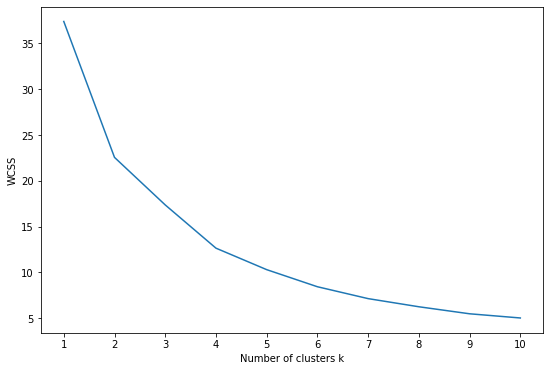

In [33]:
from sklearn.cluster import KMeans
import numpy as np
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x_sct)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of clusters k')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [34]:
#training the k-means model
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x_sct)